In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
from yaml import Loader
import numpy as np
import analyze_cells_energy as ace
import utils
from scipy.stats import ttest_ind, mannwhitneyu
import networkx as nx
import matplotlib.pyplot as plt
import copy
import itertools
from utils_graphs import select_significant_areas, create_graph, plot_graph

In [2]:
# load query file where we added volumes for each area
volumes = pd.read_csv("query_volumes_reordered.csv")
volumes = ace.clean_volumes_database(volumes)

# C57 mice

In [4]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'C57_MaleUrine_Exposure_cFos'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
dict_results_across_mice = np.load('dict_results/dict_results_across_mice_c57.npy', allow_pickle=True).item()
subjects = list(dict_results_across_mice.keys())

In [5]:
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)

In [6]:
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')

In [7]:
df_ttest_ncells = ace.test_across_groups(df_control=df_control_cell_count, 
                               df_fam=df_fam_cell_count, 
                               df_unfam=df_unfam_cell_count)
df_ttest_not_null_ncells = df_ttest_ncells.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])
df_mannwhitneyu_ncells = ace.test_across_groups(df_control=df_control_cell_count, 
                               df_fam=df_fam_cell_count, 
                               df_unfam=df_unfam_cell_count,
                                           test='mannwhitneyu')
df_mannwhitneyu_not_null_ncells = df_mannwhitneyu_ncells.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])

In [8]:
sig_areas_ncells_ttest = select_significant_areas(df=df_ttest_not_null_ncells, threshold=0.05)
sig_areas_ncells_mannwhitneyu = select_significant_areas(df=df_mannwhitneyu_not_null_ncells, threshold=0.05)

In [9]:
corr_matrix_control_ncells = ace.cross_corr(df_control_cell_count)
corr_matrix_fam_ncells = ace.cross_corr(df_fam_cell_count)
corr_matrix_unfam_ncells = ace.cross_corr(df_unfam_cell_count)

# Graph control

## only on correlations - ncells

<AxesSubplot:title={'center':'ncells UNFAM'}>

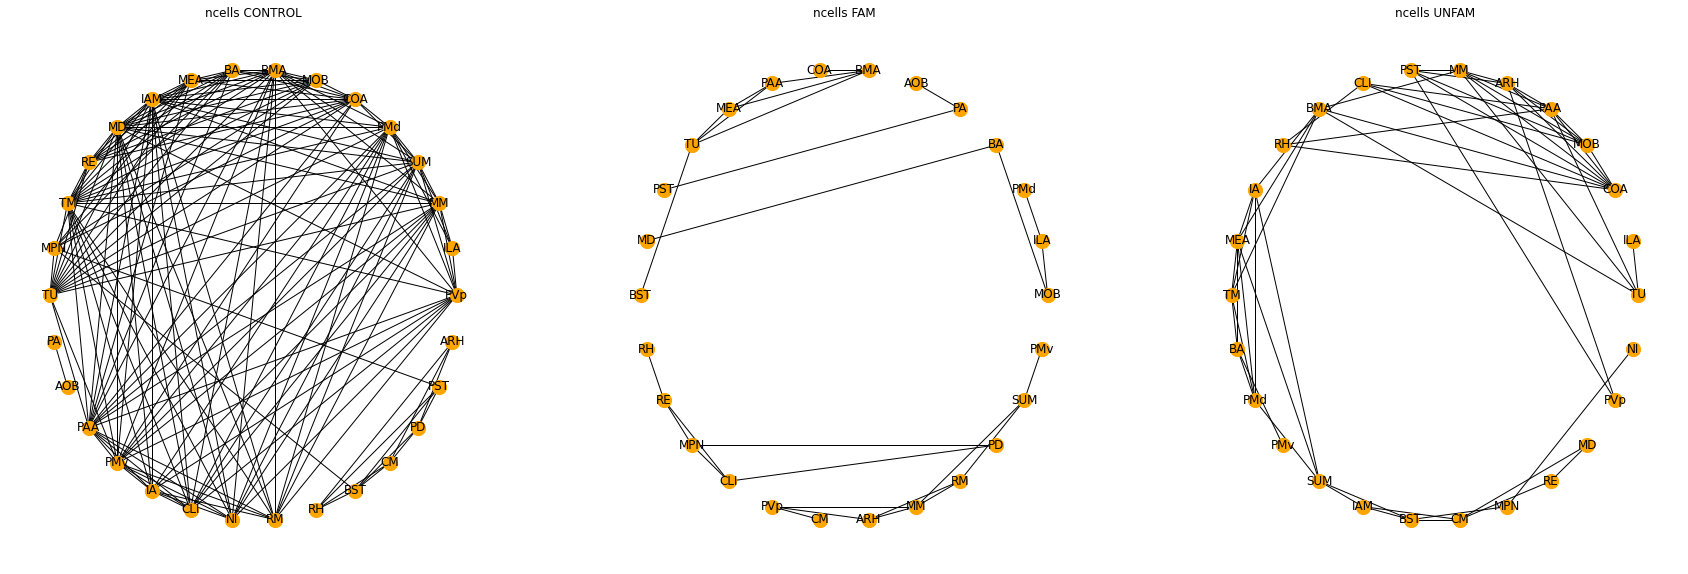

In [12]:
fig, axes = plt.subplots(1,3, figsize=(30,10))
G_control = create_graph(corr_matrix_control_ncells, 
                         significant_areas=sig_areas_ncells_ttest, 
                         corr_threshold=0.85, volumes=volumes)
G_fam = create_graph(corr_matrix_fam_ncells, 
                         significant_areas=sig_areas_ncells_ttest, 
                         corr_threshold=0.85, volumes=volumes)
G_unfam = create_graph(corr_matrix_unfam_ncells, 
                         significant_areas=sig_areas_ncells_ttest, 
                         corr_threshold=0.85, volumes=volumes)

plot_graph(G=G_control,ax=axes[0], title='ncells CONTROL')
plot_graph(G=G_fam, ax=axes[1], title='ncells FAM')
plot_graph(G=G_unfam, ax=axes[2], title='ncells UNFAM')

## only on correlation - energy

In [13]:
df_control_energy, df_fam_energy, df_unfam_energy = \
ace.calculate_value_across_groups(experimental_groups, dict_results_across_mice, value='energy')

In [14]:
df_ttest_energy = ace.test_across_groups(df_control=df_control_energy,
                                      df_fam=df_fam_energy,
                                      df_unfam=df_unfam_energy)
df_ttest_not_null_energy = df_ttest_energy.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])
df_mannwhitneyu_energy = ace.test_across_groups(df_control=df_control_energy,
                                      df_fam=df_fam_energy,
                                      df_unfam=df_unfam_energy,
                                    test='mannwhitneyu')
df_mannwhitneyu_not_null_energy = df_mannwhitneyu_energy.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])

In [15]:
sig_areas_energy_ttest = select_significant_areas(df=df_ttest_not_null_energy, threshold=0.05)
sig_areas_energy_mannwhitneyu = select_significant_areas(df=df_mannwhitneyu_not_null_energy, threshold=0.05)

In [16]:
corr_matrix_control_energy = ace.cross_corr(df_control_energy)
corr_matrix_fam_energy = ace.cross_corr(df_fam_energy)
corr_matrix_unfam_energy = ace.cross_corr(df_unfam_energy)

<AxesSubplot:title={'center':'energy UNFAM'}>

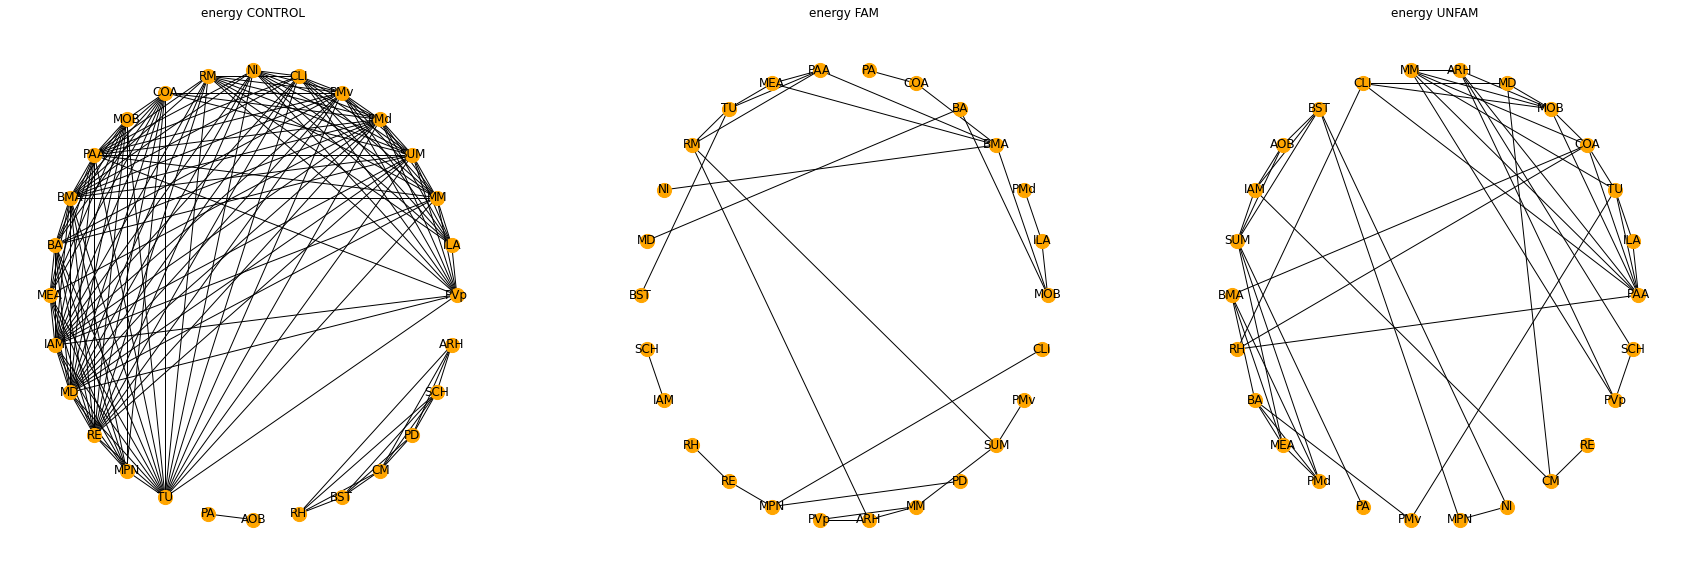

In [17]:
fig, axes = plt.subplots(1,3, figsize=(30,10))
G_control = create_graph(corr_matrix_control_energy, 
                         significant_areas=sig_areas_energy_ttest, 
                         corr_threshold=0.85, volumes=volumes)
G_fam = create_graph(corr_matrix_fam_energy, 
                         significant_areas=sig_areas_energy_ttest, 
                         corr_threshold=0.85, volumes=volumes)
G_unfam = create_graph(corr_matrix_unfam_energy, 
                         significant_areas=sig_areas_energy_ttest, 
                         corr_threshold=0.85, volumes=volumes)

plot_graph(G=G_control,ax=axes[0], title='energy CONTROL')
plot_graph(G=G_fam, ax=axes[1], title='energy FAM')
plot_graph(G=G_unfam, ax=axes[2], title='energy UNFAM')

# SWISS 19-35

In [18]:
dict_results_across_mice = np.load('dict_results/dict_results_across_mice_SW19-35.npy', allow_pickle=True).item()
subjects = list(dict_results_across_mice.keys())
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')
df_ttest_ncells = ace.test_across_groups(df_control=df_control_cell_count, 
                               df_fam=df_fam_cell_count, 
                               df_unfam=df_unfam_cell_count)
df_ttest_not_null_ncells = df_ttest_ncells.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])
df_mannwhitneyu_ncells = ace.test_across_groups(df_control=df_control_cell_count, 
                               df_fam=df_fam_cell_count, 
                               df_unfam=df_unfam_cell_count,
                                           test='mannwhitneyu')
df_mannwhitneyu_not_null_ncells = df_mannwhitneyu_ncells.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])
sig_areas_ncells_ttest = select_significant_areas(df=df_ttest_not_null_ncells, threshold=0.05)
sig_areas_ncells_mannwhitneyu = select_significant_areas(df=df_mannwhitneyu_not_null_ncells, threshold=0.05)
corr_matrix_control_ncells = ace.cross_corr(df_control_cell_count)
corr_matrix_fam_ncells = ace.cross_corr(df_fam_cell_count)
corr_matrix_unfam_ncells = ace.cross_corr(df_unfam_cell_count)

<AxesSubplot:title={'center':'ncells UNFAM'}>

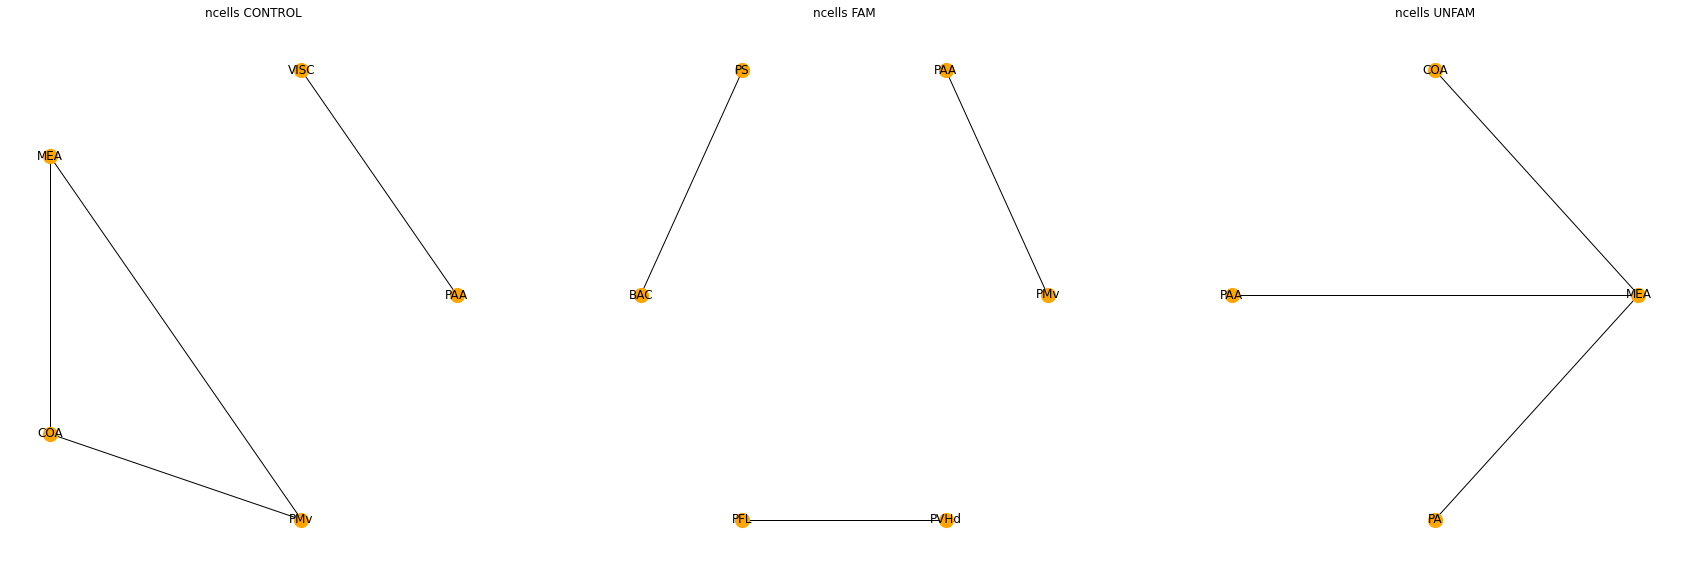

In [19]:
fig, axes = plt.subplots(1,3, figsize=(30,10))
G_control = create_graph(corr_matrix_control_ncells, 
                         significant_areas=sig_areas_ncells_ttest, 
                         corr_threshold=0.85, volumes=volumes)
G_fam = create_graph(corr_matrix_fam_ncells, 
                         significant_areas=sig_areas_ncells_ttest, 
                         corr_threshold=0.85, volumes=volumes)
G_unfam = create_graph(corr_matrix_unfam_ncells, 
                         significant_areas=sig_areas_ncells_ttest, 
                         corr_threshold=0.85, volumes=volumes)

plot_graph(G=G_control,ax=axes[0], title='ncells CONTROL')
plot_graph(G=G_fam, ax=axes[1], title='ncells FAM')
plot_graph(G=G_unfam, ax=axes[2], title='ncells UNFAM')

In [20]:
df_control_energy, df_fam_energy, df_unfam_energy = \
ace.calculate_value_across_groups(experimental_groups, dict_results_across_mice, value='energy')
df_ttest_energy = ace.test_across_groups(df_control=df_control_energy,
                                      df_fam=df_fam_energy,
                                      df_unfam=df_unfam_energy)
df_ttest_not_null_energy = df_ttest_energy.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])
df_mannwhitneyu_energy = ace.test_across_groups(df_control=df_control_energy,
                                      df_fam=df_fam_energy,
                                      df_unfam=df_unfam_energy,
                                    test='mannwhitneyu')
df_mannwhitneyu_not_null_energy = df_mannwhitneyu_energy.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])
sig_areas_energy_ttest = select_significant_areas(df=df_ttest_not_null_energy, threshold=0.05)
sig_areas_energy_mannwhitneyu = select_significant_areas(df=df_mannwhitneyu_not_null_energy, threshold=0.05)
corr_matrix_control_energy = ace.cross_corr(df_control_energy)
corr_matrix_fam_energy = ace.cross_corr(df_fam_energy)
corr_matrix_unfam_energy = ace.cross_corr(df_unfam_energy)

<AxesSubplot:title={'center':'energy UNFAM'}>

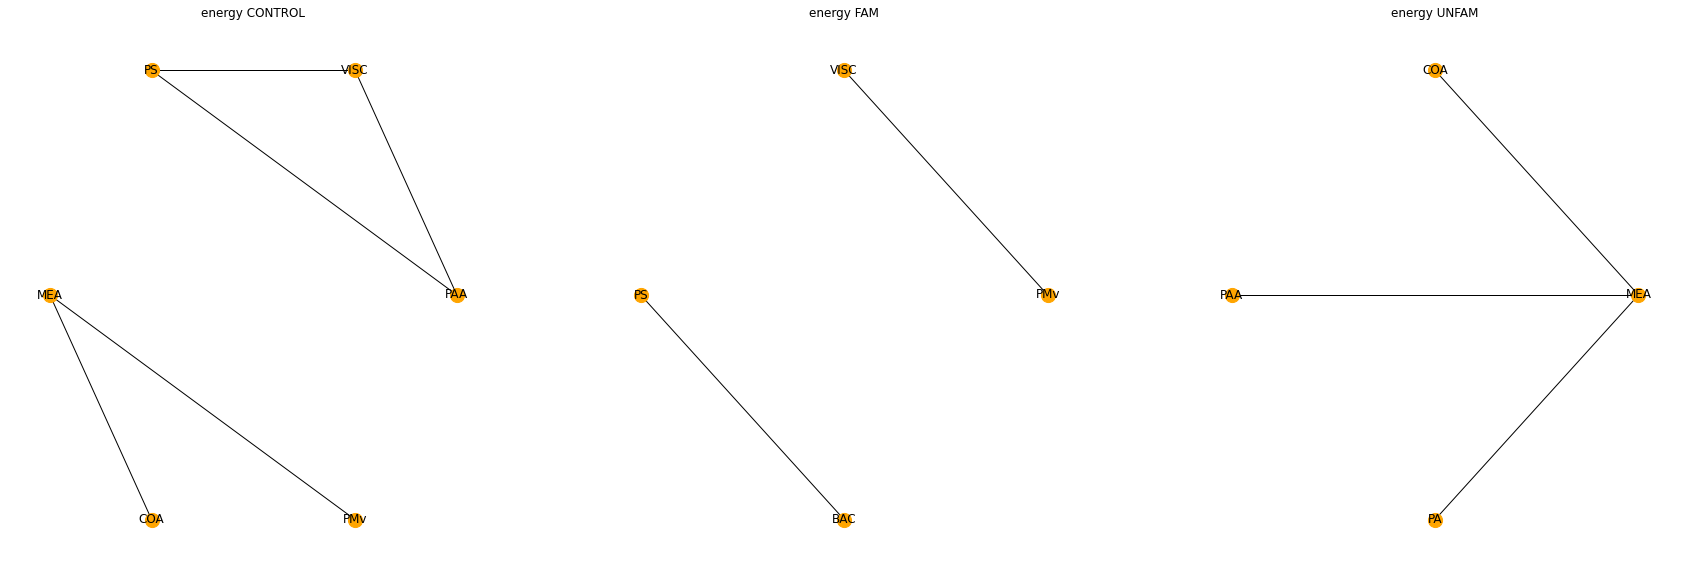

In [21]:
fig, axes = plt.subplots(1,3, figsize=(30,10))
G_control = create_graph(corr_matrix_control_energy, 
                         significant_areas=sig_areas_energy_ttest, 
                         corr_threshold=0.85, volumes=volumes)
G_fam = create_graph(corr_matrix_fam_energy, 
                         significant_areas=sig_areas_energy_ttest, 
                         corr_threshold=0.85, volumes=volumes)
G_unfam = create_graph(corr_matrix_unfam_energy, 
                         significant_areas=sig_areas_energy_ttest, 
                         corr_threshold=0.85, volumes=volumes)

plot_graph(G=G_control,ax=axes[0], title='energy CONTROL')
plot_graph(G=G_fam, ax=axes[1], title='energy FAM')
plot_graph(G=G_unfam, ax=axes[2], title='energy UNFAM')